In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Shuffled data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# The data, shuffled and split between train and test sets:
x_train[435].shape

(32, 32, 3)

[4]


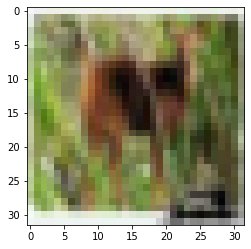

In [5]:
## Each image is a 32 x 32 x 3 numpy array
print(y_train[435])
plt.imshow(x_train[435]);

[0]


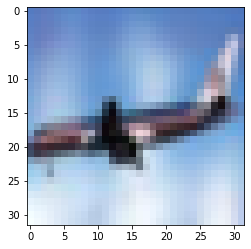

In [6]:
print(y_train[213])
plt.imshow(x_train[213]);

In [7]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [9]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [10]:
# Let's build a CNN using Keras' Sequential capabilities
model_1 = Sequential()

# 5x5 convolution with 2x2 stride and 32 filter
model_1.add(Conv2D(32, (5, 5), strides = (2, 2), padding='same',
                  input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

#Another 5x5 convolution with 2x2 stride and 32 filter
model_1.add(Conv2D(32, (5, 5), strides = (2, 2)))
model_1.add(Activation('relu'))

#2x2 max pooling reduces to 3x3x32
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

#Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

2022-03-25 23:57:38.670679: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-25 23:57:38.699839: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

We still have 181K parameters, even though this is a "small" model.


In [11]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

#Training the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [12]:
model_1.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=20,
           validation_data=(x_test, y_test),
           shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 22s 443us/step - loss: 1.7372 - accuracy: 0.3668 - val_loss: 1.4105 - val_accuracy: 0.4838
Epoch 2/20
50000/50000 [==============================] - 19s 374us/step - loss: 1.4550 - accuracy: 0.4750 - val_loss: 1.3962 - val_accuracy: 0.4910
Epoch 3/20
50000/50000 [==============================] - 19s 372us/step - loss: 1.3508 - accuracy: 0.5192 - val_loss: 1.2928 - val_accuracy: 0.5427
Epoch 4/20
50000/50000 [==============================] - 19s 374us/step - loss: 1.2840 - accuracy: 0.5431 - val_loss: 1.1663 - val_accuracy: 0.5906
Epoch 5/20
50000/50000 [==============================] - 18s 368us/step - loss: 1.2320 - accuracy: 0.5635 - val_loss: 1.1557 - val_accuracy: 0.5848
Epoch 6/20
50000/50000 [==============================] - 19s 389us/step - loss: 1.1989 - accuracy: 0.5756 - val_loss: 1.1114 - val_accuracy: 0.6136
Epoch 7/20
50000/50000 [==============================] 

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [13]:
# Let's build a CNN using Keras' Sequential capabilities
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                  input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)       

In [14]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)


# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
               optimizer=opt_2,
               metrics=['accuracy'])

In [15]:
model_2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=7,
           validation_data=(x_test, y_test),
           shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/7
50000/50000 [==============================] - 126s 3ms/step - loss: 1.5691 - accuracy: 0.4309 - val_loss: 1.4082 - val_accuracy: 0.4961
Epoch 2/7
50000/50000 [==============================] - 126s 3ms/step - loss: 1.1722 - accuracy: 0.5855 - val_loss: 1.0618 - val_accuracy: 0.6269
Epoch 3/7
50000/50000 [==============================] - 125s 2ms/step - loss: 1.0037 - accuracy: 0.6494 - val_loss: 0.9266 - val_accuracy: 0.6794
Epoch 4/7
50000/50000 [==============================] - 126s 3ms/step - loss: 0.9155 - accuracy: 0.6837 - val_loss: 0.9005 - val_accuracy: 0.6947
Epoch 5/7
50000/50000 [==============================] - 126s 3ms/step - loss: 0.8559 - accuracy: 0.7043 - val_loss: 0.8153 - val_accuracy: 0.7247
Epoch 6/7
50000/50000 [==============================] - 124s 2ms/step - loss: 0.8193 - accuracy: 0.7197 - val_loss: 0.9614 - val_accuracy: 0.6928
Epoch 7/7
50000/50000 [==============================] - 127s 3ms/st